In [36]:
import pandas as pd
train= pd.read_csv('E:/competionfile/train.csv')
test = pd.read_csv('E:/competionfile/test.csv')

In [38]:
train_data.shape

(1999994, 5)

In [78]:
##prefixctr
ggr = train_data.groupby('prefix')
ddmap = {}
for name , group in ggr:
    ddmap[name]=group['label'].astype(int).mean()
train_data['prefix_ctr'] = train_data['prefix'].map( lambda x : ddmap[x] if ddmap.get(x) is not None else 0.374734 )

In [59]:
train_data_pred = pd.read_csv('e:/predictwzdis.csv',header=None)
test_data_pred = pd.read_csv('e:/cpredictwzdis.csv',header=None)
train_X_data['predictwzdis'] =  train_data_pred[0]
test_X_data['predictwzdis'] =  test_data_pred[0]

In [73]:
train_X_data.columns

Index(['ykk', 'kk', 'count', 'gjctr', 'smi_pre_ti', 'prefix_len', 'ocrcount',
       'prefix_ctr', 'predictwzdis'],
      dtype='object')

In [61]:
test_X_data.columns

Index(['title_tag_ctr', 'ykk', 'kk', 'count', 'gjctr', 'smi_pre_ti',
       'prefix_len', 'ocrcount', 'prefix_ctr', 'predictwzdis'],
      dtype='object')

In [58]:
# train_data

In [79]:
test_data['prefix_ctr'] = test_data['prefix'].map( lambda x :   ddmap[x] if ddmap.get(x) is not None else 0.374734 )

In [80]:
test_X_data['prefix_ctr'] = test_data['prefix_ctr']
train_X_data['prefix_ctr'] = train_data['prefix_ctr']

In [81]:
# train_X_data.drop('title_tag_ctr',axis=1,inplace=True)
# test_X_data.drop('title_tag_ctr',axis=1,inplace=True)
train_X_data.columns

Index(['ykk', 'kk', 'count', 'gjctr', 'smi_pre_ti', 'prefix_len', 'ocrcount',
       'prefix_ctr', 'predictwzdis'],
      dtype='object')

In [46]:
test_data['prefix_ctr'] = 

Index(['title_tag_ctr', 'prefix_tag_ctr2', 'ykk', 'kk', 'count', 'lable',
       'gjctr', 'smi_pre_ti', 'prefix_len', 'ocrcount'],
      dtype='object')

In [77]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
train_data = pd.read_table('E:/competionfile/oppo/new/oppo_round1_train_20180929/oppo_round1_train_20180929.txt',names=[0,1,2,3,4],header=None,encoding='utf8').astype(str)
train_data = train_data[train_data[4] != '音乐' ]
test_data = pd.read_table('E:/competionfile/oppo/new/oppo_round1_train_20180929/oppo_round1_vali_20180929.txt',header=None) #用验证集

train_data.columns = ['prefix','query_prediction','title','tag','label']
test_data.columns = ['prefix','query_prediction','title','tag','label']
#删除验证集和训练集中的tag = 推广，测试集中没有
test_data = test_data.drop([12237])
train_data = train_data.drop([114987,244937,860181,920381])# train_data :199994  test_data 199994:


In [24]:
train_data_ykk = pd.read_csv('e:/avgpredictwzdis.csv',header=None)
test_data_ykk = pd.read_csv('e:/cavgcpredictwzdis.csv',header=None)
train_X_data['avgpredictwzdis'] =  train_data_ykk
test_X_data['avgpredictwzdis'] = test_data_ykk

In [32]:
train_X_data.drop('avgpredictwzdis',axis=1,inplace=True)
test_X_data.drop('avgpredictwzdis',axis=1,inplace=True)

In [59]:
#计算一下title_count
train_data['title_count'] = 0 
title_count_group = train_data.groupby('title')
title_count_dic = {}
for name,group in title_count_group:
    title_count_dic[name] = len(group)
def title_count(item):
    return title_count_dic[item['title']]
train_data['title_count'] = train_data.apply(title_count,axis=1)

test_data['title_count'] = 0 
title_count_group = test_data.groupby('title')
title_count_dic = {}
for name,group in title_count_group:
    title_count_dic[name] = len(group)
def title_count(item):
    return title_count_dic[item['title']]
test_data['title_count'] = test_data.apply(title_count,axis=1)

In [107]:
#tag_count
tag_count_group = train_data.groupby(['tag'])
train_data['tag_count'] = 0
tag_count_dic = {}
for name , group in tag_count_group:
    tag_count_dic[name] = len(group)
def tag_count(item):
    return tag_count_dic[item['tag']]
train_data['tag_count'] = train_data.apply(tag_count,axis=1)

tag_count_group = test_data.groupby(['tag'])
test_data['tag_count'] = 0
tag_count_dic = {}
for name , group in tag_count_group:
    tag_count_dic[name] = len(group)
def tag_count(item):
    return tag_count_dic[item['tag']]
test_data['tag_count'] = test_data.apply(tag_count,axis=1)

In [134]:
#prefix下tag点击次数
prefix_tag_count_group = train_data.groupby(['prefix','tag'])
train_data['prefix_tag_count'] = 0
prefix_tag_count_dic = {}
for name,group in prefix_tag_count_group:
    prefix_tag_count_dic[name] = len(group)
def train_prefix_tag_count(item):
    return prefix_tag_count_dic[(item['prefix'],item['tag'])]
train_data['prefix_tag_count'] = train_data.apply(train_prefix_tag_count,axis=1)

prefix_tag_count_group = test_data.groupby(['prefix','tag'])
test_data['prefix_tag_count'] = 0
prefix_tag_count_dic = {}
for name,group in prefix_tag_count_group:
    prefix_tag_count_dic[name] = len(group)
def test_prefix_tag_count(item):
    return prefix_tag_count_dic[(item['prefix'],item['tag'])]
test_data['prefix_tag_count'] = test_data.apply(test_prefix_tag_count,axis=1)

In [ ]:
#prefix下title的点击率
prefix_title_count_group = train_data.groupby(['prefix','title'])
train_data['prefix_title_count'] = 0
prefix_title_dic = {}
for name,group in prefix_title_count_group:
    prefix_title_dic[name] = len(group)
def train_prefix_title_count(item):
    return prefix_title_dic[(item['prefix'],item['title'])]
train_data['prefix_title_count'] = train_data.apply(train_prefix_title_count,axis=1)

prefix_title_count_group = test_data.groupby(['prefix','title'])
test_data['prefix_title_count'] = 0
prefix_title_dic = {}
for name,group in prefix_title_count_group:
    prefix_title_dic[name] = len(group)
def test_prefix_title_count(item):
    return prefix_title_dic[(item['prefix'],item['title'])]
test_data['prefix_title_count'] = test_data.apply(test_prefix_title_count,axis=1)

In [ ]:
#title下的tag数量
title_tag_count_group = train_data.groupby(['title','tag'])
train_data['title_tag_count'] = 0
title_tag_count_dic = {}
for name,group in title_tag_count_group:
    title_tag_count_dic[name] = len(group)
def train_title_tag_count(item):
    return title_tag_count_dic[(item['title'],item['tag'])]
train_data['title_tag_count'] = train_data.apply(train_title_tag_count,axis=1)

title_tag_count_group = test_data.groupby(['title','tag'])
test_data['title_tag_count'] = 0
title_tag_count_dic = {}
for name,group in title_tag_count_group:
    title_tag_count_dic[name] = len(group)
def test_title_tag_count(item):
    return title_tag_count_dic[(item['title'],item['tag'])]
test_data['title_tag_count'] = test_data.apply(test_title_tag_count,axis=1)

In [10]:
#query = prefix .title,tag
prefix_title_tag_count_group = train_data.groupby(['prefix','title','tag'])
train_data['prefix_title_tag_count'] = 0 
prefix_title_tag_dic = {}
for name,group in prefix_title_tag_count_group:
    prefix_title_tag_dic[name] = len(group)
def train_prefix_title_tag_count(item):
    return prefix_title_tag_dic[(item['prefix'],item['title'],item['tag'])]
train_data['prefix_title_tag_count'] = train_data.apply(train_prefix_title_tag_count,axis=1)

prefix_title_tag_count_group = test_data.groupby(['prefix','title','tag'])
test_data['prefix_title_tag_count'] = 0 
prefix_title_tag_dic = {}
for name,group in prefix_title_tag_count_group:
    prefix_title_tag_dic[name] = len(group)
def test_prefix_title_tag_count(item):
    return prefix_title_tag_dic[(item['prefix'],item['title'],item['tag'])]
test_data['prefix_title_tag_count'] = test_data.apply(test_prefix_title_tag_count,axis=1)


In [4]:
train = train[['title_tag_ctr','prefix_tag_ctr2','ykk','kk','count','lable','gjctr','smi_pre_ti','prefix_len','ocrcount']]
test = test[['title_tag_ctr','prefix_tag_ctr2','ykk','kk','count','lable','gjctr','smi_pre_ti','prefix_len','ocrcount']]

In [11]:
train['count'] = train_data['prefix_title_tag_count']
test['count'] = test_data['prefix_title_tag_count']

In [67]:
#prefix_title_tag_ctr
# train_data['lable'] = train_data['label'].astype(int)
# t = train_data.groupby(['prefix','title','tag'])
# train_data['prefix_title_tag_ctr'] = 0 
# prefix_title_tag_dic = {}
# for name,group in t:
#     prefix_title_tag_dic[name] = group['lable'].mean()
# def prefix_title_tag(item):
#     return prefix_title_tag_dic[(item['prefix'],item['title'],item['tag'])]
# train_data['prefix_title_tag_ctr'] = train_data.apply(prefix_title_tag,axis=1)

def prefix_title_tag(item):
    return prefix_title_tag_dic.get((item['prefix'],item['title'],item['tag']),0.374734)
test_data['prefix_title_tag_ctr'] = test_data.apply(prefix_title_tag,axis=1)

In [19]:
train_X_data['totalsim'] = train_X_data['query_title_sm']+train_X_data[0]
train_X_data['totalsim2'] = train_X_data[0]*train_X_data['prefix_len']
train_X_data['prefix_tag_ctr2'] = train_X_data['prefix_tag_ctr']*train_X_data['prefix_len']
test_X_data['totalsim'] = test_X_data['query_title_sm']*test_X_data[0]
test_X_data['totalsim2'] = test_X_data[0]*test_X_data['prefix_len']
test_X_data['prefix_tag_ctr2'] = test_X_data['prefix_tag_ctr']*test_X_data['prefix_len']

KeyError: 0

In [47]:
##待会儿记着删了
import pickle
f = open('e:/countmap.pickle','rb')
countmap = pickle.load( f )
def getcount( item ):
    return countmap.get(item,0)
train_X_data['ocrcount'] = train_X_data[0].map(  getcount )
test_X_data['ocrcount'] = test_X_data[0].map(  getcount )

FileNotFoundError: [Errno 2] No such file or directory: 'e:/countmap.pickle'

In [6]:
train_X_data = train.drop('lable',axis=1)
train_Y_data = train['lable']

vali_data = test['lable']
test_X_data = test.drop('lable',axis=1)

In [82]:
#用xgb跑一下
from pylab import mpl
from matplotlib import pyplot as plt
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
# def plot_feature_importance(df,title):
#         """
#     Plot importances returned by a model. This can work with any measure of
#     feature importance provided that higher importance is better. 
    
#     Args:
#         df (dataframe): feature importances. Must have the features in a column
#         called `features` and the importances in a column called `importance
        
#     Returns:
#         shows a plot of the 15 most importance features
        
#         df (dataframe): feature importances sorted by importance (highest to lowest) 
#         with a column for normalized importance
#         """
#         df = df.sort_values('importance',ascending = False,).reset_index()
#         df['importance_normalized'] = df['importance']/df['importance'].sum()
        
#         plt.figure(figsize=(10,6))
#         ax = plt.subplot()
        
#         #取前15个feature
#         ax.barh(list(reversed(list(df.index[:]))), df['importance_normalized'], align = 'center', edgecolor = 'k')
        
#         ax.set_yticks(list(reversed(list(df.index[:]))))
#         ax.set_yticklabels(df['feature'])
        
#         plt.xlabel('Normalized Importance')
#         plt.title(title)
        
# #         plt.show()
        
#         return df
from sklearn.metrics import confusion_matrix
def customedscore(preds, dtrain):
    score = f1_score(train.get_label(),pd.Series(preds).map( lambda x: 1 if x >= 0.5 else 0 ))
    return 'myFeval',score,False
import xgboost as xgb
xgb =  xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=9, min_child_weight=5, missing=None, n_estimators=10,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=0,
       subsample=0.8 )
model = xgb.fit(train_X_data,train_Y_data , eval_metric="error" )
feature_importance_values = model.feature_importances_
features = list(train_X_data.columns)

xgb_feature_importances = pd.DataFrame({'feature':features,'importance':feature_importance_values})

# plot_feature_importance(xgb_feature_importances,'xgb_feature_importances')

,index,feature,importance,importance_normalized
0,2,count,0.248752,0.248752
1,8,predictwzdis,0.205339,0.205339
2,3,gjctr,0.190120,0.190120
3,7,prefix_ctr,0.133982,0.133982
4,4,smi_pre_ti,0.119012,0.119012
5,5,prefix_len,0.050649,0.050649
6,1,kk,0.038423,0.038423
7,0,ykk,0.013723,0.013723
8,6,ocrcount,0.000000,0.000000


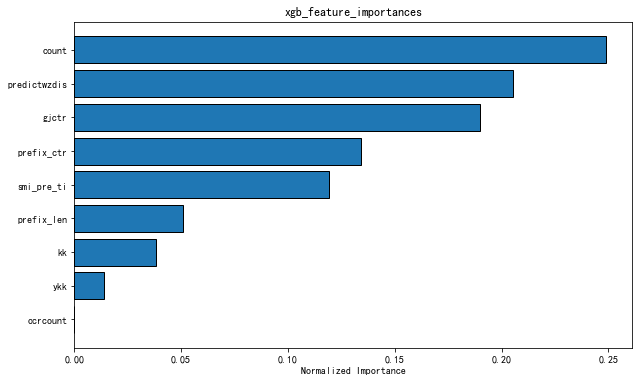

In [71]:
def plot_feature_importance(df,title):
        """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
        df = df.sort_values('importance',ascending = False,).reset_index()
        df['importance_normalized'] = df['importance']/df['importance'].sum()
        
        plt.figure(figsize=(10,6))
        ax = plt.subplot()
        
        #取前15个feature
        ax.barh(list(reversed(list(df.index[:]))), df['importance_normalized'], align = 'center', edgecolor = 'k')
        
        ax.set_yticks(list(reversed(list(df.index[:]))))
        ax.set_yticklabels(df['feature'])
        
        plt.xlabel('Normalized Importance')
        plt.title(title)
        
#         plt.show()
        
        return df
plot_feature_importance(xgb_feature_importances,'xgb_feature_importances')

In [64]:
from sklearn.metrics import f1_score
import lightgbm as lgb
params = {'metric': 'l1',
          'boosting_type': 'gbdt',
          'max_depth':10,
          'num_leaves':300,
          'num_threads':4,
          'objective':'binary',
          'bagging_fraction':0.9,
          # 'bagging_freq':1,
          'learning_rate' : 0.022,
#           'min_data_in_leaf' : 500,
#           'min_data_per_group' : 1,
          # 'weight' : ''
          }

def myFeval(   preds, train):
#     aa = pd.Series(train.get_label()).map( lambda x: 1 if x >= 0.5 else 0 )
#     print()
    score = f1_score(train.get_label(),pd.Series(preds).map( lambda x: 1 if x >= 0.5 else 0 ))
    return 'myFeval',score,False
train_data = lgb.Dataset( train_X_data , train_Y_data  ,free_raw_data=False ,  )
test_data = lgb.Dataset( test_X_data , vali_data , reference= train_data )
gbm = lgb.train(params,train_data,valid_sets=test_data,num_boost_round=20,feval = myFeval )

[1]	valid_0's l1: 0.384134	valid_0's myFeval: 0.710774
[2]	valid_0's l1: 0.396218	valid_0's myFeval: 0.702349
[3]	valid_0's l1: 0.408039	valid_0's myFeval: 0.708625
[4]	valid_0's l1: 0.419722	valid_0's myFeval: 0.709999
[5]	valid_0's l1: 0.430614	valid_0's myFeval: 0.75092
[6]	valid_0's l1: 0.441476	valid_0's myFeval: 0.751034
[7]	valid_0's l1: 0.452141	valid_0's myFeval: 0.750708
[8]	valid_0's l1: 0.462663	valid_0's myFeval: 0.750796
[9]	valid_0's l1: 0.472918	valid_0's myFeval: 0.718877
[10]	valid_0's l1: 0.482827	valid_0's myFeval: 0.720353


KeyboardInterrupt: 

In [44]:

limit = model.best_iteration

AttributeError: 'XGBClassifier' object has no attribute 'best_iteration'

In [83]:
from sklearn.metrics import classification_report
xgb_predict_label = model.predict(test_X_data)
# xgb_predict_lable = pd.Series( xgb_predict_label ).map( lambda  x : 1 if x > 0.5 else 0 )
print('xgb_predict')
print(classification_report(vali_data,xgb_predict_label,digits=4))

xgb_predict
             precision    recall  f1-score   support

          0     0.8429    0.9017    0.8713     31414
          1     0.8117    0.7158    0.7608     18585

avg / total     0.8313    0.8326    0.8302     49999



In [74]:
from sklearn.metrics import f1_score
print(f1_score(vali_data, xgb_predict_label))  # 0.70476

0.7593427283619558


In [116]:
#输出预测结果
import numpy as np 
np.savetxt('xgb_predict_label.txt',xgb_predict_label)

In [119]:
from pylab import mpl
from matplotlib import pyplot as plt
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
def plot_feature_importance(df,title):
        """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
        df = df.sort_values('importance',ascending = False,).reset_index()
        df['importance_normalized'] = df['importance']/df['importance'].sum()
        
        plt.figure(figsize=(10,6))
        ax = plt.subplot()
        
        #取前15个feature
        ax.barh(list(reversed(list(df.index[:]))), df['importance_normalized'], align = 'center', edgecolor = 'k')
        
        ax.set_yticks(list(reversed(list(df.index[:]))))
        ax.set_yticklabels(df['feature'])
        
        plt.xlabel('Normalized Importance')
        plt.title(title)
        
        plt.show()
        
        return df

In [125]:
train_X_data[0] = train_X_data[0].fillna(0)
test_X_data[0] = test_X_data[0].fillna(0)

KeyError: 0

In [126]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
model = LR.fit(train_X_data,train_Y_data)

lr_predict_label = model.predict(test_X_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [123]:
lr_predict_label = pd.DataFrame(lr_predict_label)
lr_predict_label

,0
0,0.027832
1,0.043762
2,0.043884
3,0.067749
4,0.012207
5,0.195374
6,0.617188
7,0.101379
8,0.587097
9,0.137878


In [110]:
from sklearn.metrics import classification_report
print('lr_predict')
print(classification_report(vali_data,lr_predict_label[0].map(lambda x:1 if x >= 0.5 else 0)))

lr_predict
             precision    recall  f1-score   support

          0       0.79      0.91      0.84     31414
          1       0.79      0.59      0.68     18585

avg / total       0.79      0.79      0.78     49999



In [23]:
train_X_data

,title_tag_ctr,prefix_tag_ctr2,ykk,kk,count,gjctr,smi_pre_ti,prefix_len,ocrcount
0,0.065217,0.130435,30,0.000000,46,0.003080,1.000000,2,0
1,0.000000,0.000000,30,0.000000,1,0.011147,0.421053,4,0
2,1.000000,4.000000,30,0.000000,1,0.011147,0.888889,4,0
3,0.620690,1.268041,1,0.666667,194,0.010282,0.400000,2,0
4,0.506849,1.878788,1,0.888889,66,0.025076,0.666667,4,0
5,0.842941,6.000000,1,0.909091,1,0.011147,0.705882,6,0
6,0.321962,0.615385,1,0.857143,56,0.016255,0.400000,4,0
7,0.273810,0.492754,1,0.800000,552,0.007277,0.400000,2,0
8,0.124638,6.000000,1,0.909091,1,0.011147,0.500000,6,0
9,0.200000,0.280702,30,0.000000,30,0.004205,0.400000,2,0


In [21]:
train_X_data = train_data.drop('lable',axis=1)
train_Y_data = train_data['lable']

vali_data = test_data['lable']
test_X_data = test_data.drop('lable',axis=1)

KeyError: "labels ['lable'] not contained in axis"

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_train_lr,y_train,y_train_lr = train_test_split(train_X_data,train_Y_data,test_size=0.5)

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=50,learning_rate=0.008,min_samples_split=3,min_samples_leaf=2,max_depth=5,verbose=0)
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.008, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [49]:
from sklearn.preprocessing import OneHotEncoder
grd_enc = OneHotEncoder()
grd_enc.fit(gb.apply(X_train)[:, :, 0])


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [60]:
X_train_lr[['0','totalsim','totalsim2']]=X_train_lr[['0','totalsim','totalsim2']].fillna(0)

C:\Users\thinkpad\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [75]:
from sklearn.linear_model import LogisticRegression
grd_lm = LogisticRegression()
grd_lm.fit(grd_enc.transform(gb.apply(X_train_lr)[:, :, 0]), y_train_lr)
y_pred_grd_lm = grd_lm.predict(grd_enc.transform(gb.apply(test_X_data)))

ValueError: Found array with dim 3. Estimator expected <= 2.

In [76]:
from sklearn.metrics import classification_report
print(classification_report(vali_data,y_pred_grd_lm,digits=8))


ValueError: Mix type of y not allowed, got types {'binary', 'continuous'}

In [67]:
y_pred_grd_lm

array([8.22272178e-05, 4.26250336e-03, 2.58140400e-02, ...,
       2.83862758e-01, 3.42316633e-01, 2.83862758e-01])

In [68]:
from sklearn.metrics import roc_curve
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(vali_data, y_pred_grd_lm)

In [70]:
tpr_grd_lm

array([5.38068335e-05, 9.33010492e-02, 1.04654291e-01, ...,
       9.89346247e-01, 1.00000000e+00, 1.00000000e+00])